## Bubble Sort

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                temp = arr[j]
                arr[j] = arr[j + 1]
                arr[j + 1] = temp

In [2]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)

In [3]:
a

[1, 2, 3, 4, 5]

## Quick Sort

In [4]:
import random

def quicksort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quicksort(arr, low, pivot_index)
        quicksort(arr, pivot_index + 1, high)

def partition(arr, low, high):
    # implementing code to select pivot (median of threes)
    # Calculate median of three
    # move
    pivot = arr[low]
    left = low + 1
    right = high
    done = False
    while not done:
        while left <= right and arr[left] <= pivot:
            left = left + 1
        while arr[right] >= pivot and right >= left:
            right = right - 1
        if right < left:
            done = True
        else:
            arr[left], arr[right] = arr[right], arr[left]
    arr[low], arr[right] = arr[right], arr[low]
    return right

In [5]:
a = [5, 4, 3, 2, 1]
quicksort(a, 0, len(a) - 1)

In [6]:
a

[1, 2, 3, 4, 5]

## Creating 20 Arrays

In [7]:
# Finding decent array sizes that scale decently

array_sizes = [i ** 2 for i in range(20)]
array_sizes

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

## Measuring Bubble Sort

In [8]:
import time

def measureAverageBubbleSort(array_size):
    
    array = [random.randint(0, array_size) for _ in range(array_size)]
    start = time.perf_counter()
    bubble_sort(array)
    stop = time.perf_counter()
    avg_time = stop - start
    # DEBUG
    # print(f"For an array size of {array_size}, avearge bubble_sort takes {avg_time} seconds")
    # print(array)

    return avg_time

def measureBestBubbleSort(array_size):

    array = [i for i in range(array_size)]
    start = time.perf_counter()
    bubble_sort(array)
    stop = time.perf_counter()
    avg_time = stop - start
    # DEBUG
    # print(f"For an array size of {array_size}, best bubble_sort takes {avg_time} seconds")
    # print(array)

    return avg_time

def measureWorstBubbleSort(array_size):

    array = [array_size - i - 1 for i in range(array_size)]
    start = time.perf_counter()
    bubble_sort(array)
    stop = time.perf_counter()
    avg_time = stop - start
    # DEBUG
    # print(f"For an array size of {array_size}, worst bubble_sort takes {avg_time} seconds")
    # print(array)

    return avg_time

In [9]:
bubble_best_times = []
for size in array_sizes:
    bubble_best_times.append(measureBestBubbleSort(size))

bubble_average_times = []
for size in array_sizes:
    bubble_average_times.append(measureAverageBubbleSort(size))

bubble_worst_times = []
for size in array_sizes:
    bubble_worst_times.append(measureWorstBubbleSort(size))

## Measuring Quick Sort

In [10]:
import time

def measureBestQuickSort():
    

SyntaxError: incomplete input (2635833765.py, line 4)

## Curve fitting Bubble Sort

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def quadratic_model(x, a, b):
    return a * x ** 2 + b

params_bubble_average, _ = curve_fit(quadratic_model, array_sizes, bubble_average_times)
params_bubble_worst, _ = curve_fit(quadratic_model, array_sizes, bubble_worst_times)
params_bubble_best, _ = curve_fit(quadratic_model, array_sizes, bubble_best_times)


## Curve Fitting Quick Sort

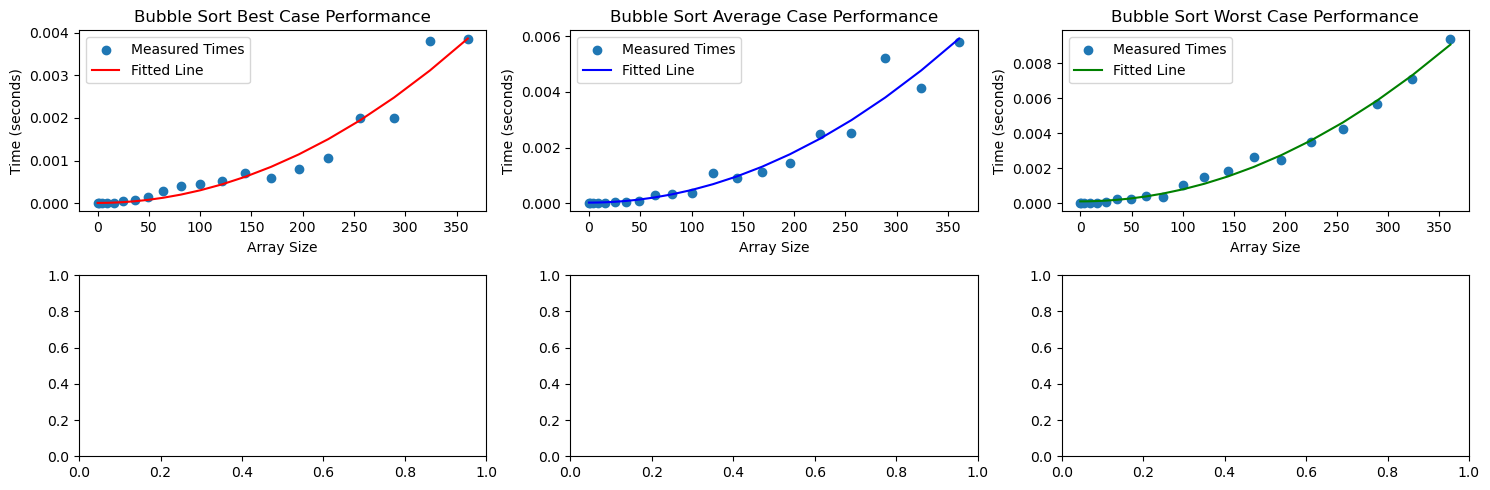

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize= (15, 5))

bubble_best = axs[0, 0]
bubble_average = axs[0, 1]
bubble_worst = axs[0, 2]

# quicksort = axs[1]

# bubble sort Plot
bubble_best.scatter(array_sizes, bubble_best_times, label='Measured Times')
bubble_best.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_bubble_best), label='Fitted Line', color='red')

bubble_average.scatter(array_sizes, bubble_average_times, label='Measured Times')
bubble_average.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_bubble_average), label='Fitted Line', color='blue')

bubble_worst.scatter(array_sizes, bubble_worst_times, label='Measured Times')
bubble_worst.plot(array_sizes, quadratic_model(np.array(array_sizes), *params_bubble_worst), label='Fitted Line', color='green')

bubble_best.set_title('Bubble Sort Best Case Performance')
bubble_average.set_title("Bubble Sort Average Case Performance")
bubble_worst.set_title("Bubble Sort Worst Case Performance")

bubble_best.set_xlabel("Array Size")
bubble_average.set_xlabel("Array Size")
bubble_worst.set_xlabel("Array Size")

bubble_best.set_ylabel("Time (seconds)")
bubble_average.set_ylabel("Time (seconds)")
bubble_worst.set_ylabel("Time (seconds)")

bubble_best.legend()
bubble_average.legend()
bubble_worst.legend()

# binary.legend()

plt.tight_layout()
plt.show()